**KIDNEY**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,roc_auc_score
import scipy.stats as stats
import seaborn as sns


In [5]:
df = pd.read_csv('/content/Untitled spreadsheet - csv_result-chronic_kidney_disease_full(1).csv')
data = df
data.head()

,id,age,bp,sg,al,su,bc,pc,pcc,ba,...,pcv,wbcc,bcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,2,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,3,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,4,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,5,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [6]:
data.shape

(400, 26)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      400 non-null    int64  
 1   age     391 non-null    float64
 2   bp      388 non-null    float64
 3   sg      353 non-null    float64
 4   al      354 non-null    float64
 5   su      351 non-null    float64
 6   bc      248 non-null    object 
 7   pc      335 non-null    object 
 8   pcc     396 non-null    object 
 9   ba      396 non-null    object 
 10  bg      356 non-null    float64
 11  bu      381 non-null    float64
 12  sc      383 non-null    float64
 13  sod     313 non-null    float64
 14  pot     312 non-null    float64
 15  hemo    348 non-null    float64
 16  pcv     329 non-null    float64
 17  wbcc    294 non-null    float64
 18  bcc     269 non-null    float64
 19  htn     398 non-null    object 
 20  dm      397 non-null    object 
 21  cad     398 non-null    object 
 22  ap

In [8]:
data.describe()

,id,age,bp,sg,al,su,bg,bu,sc,sod,pot,hemo,pcv,wbcc,bcc
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,200.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,1.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,100.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,200.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,300.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,400.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [9]:
data.isna().sum()

id         0
age        9
bp        12
sg        47
al        46
su        49
bc       152
pc        65
pcc        4
ba         4
bg        44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
bcc      131
htn        2
dm         3
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [10]:
data.corr()

<ipython-input-10-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,id,age,bp,sg,al,su,bg,bu,sc,sod,pot,hemo,pcv,wbcc,bcc
id,1.000000,-0.185308,-0.245744,0.642156,-0.541993,-0.283416,-0.338673,-0.307175,-0.268683,0.364251,-0.092347,0.640298,0.630019,-0.198641,0.605072
age,-0.185308,1.000000,0.159480,-0.191096,0.122091,0.220866,0.244992,0.196985,0.132531,-0.100046,0.058377,-0.192928,-0.242119,0.118339,-0.268896
bp,-0.245744,0.159480,1.000000,-0.218836,0.160689,0.222576,0.160193,0.188517,0.146222,-0.116422,0.075151,-0.306540,-0.326319,0.029753,-0.261936
sg,0.642156,-0.191096,-0.218836,1.000000,-0.469760,-0.296234,-0.374710,-0.314295,-0.361473,0.412190,-0.072787,0.602582,0.603560,-0.236215,0.579476
al,-0.541993,0.122091,0.160689,-0.469760,1.000000,0.269305,0.379464,0.453528,0.399198,-0.459896,0.129038,-0.634632,-0.611891,0.231989,-0.566437
su,-0.283416,0.220866,0.222576,-0.296234,0.269305,1.000000,0.717827,0.168583,0.223244,-0.131776,0.219450,-0.224775,-0.239189,0.184893,-0.237448
bg,-0.338673,0.244992,0.160193,-0.374710,0.379464,0.717827,1.000000,0.143322,0.114875,-0.267848,0.066966,-0.306189,-0.301385,0.150015,-0.281541
bu,-0.307175,0.196985,0.188517,-0.314295,0.453528,0.168583,0.143322,1.000000,0.586368,-0.323054,0.357049,-0.610360,-0.607621,0.050462,-0.579087
sc,-0.268683,0.132531,0.146222,-0.361473,0.399198,0.223244,0.114875,0.586368,1.000000,-0.690158,0.326107,-0.401670,-0.404193,-0.006390,-0.400852
sod,0.364251,-0.100046,-0.116422,0.412190,-0.459896,-0.131776,-0.267848,-0.323054,-0.690158,1.000000,0.097887,0.365183,0.376914,0.007277,0.344873


<ipython-input-11-04854c80fc75>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True,fmt='.0%')


<Axes: >

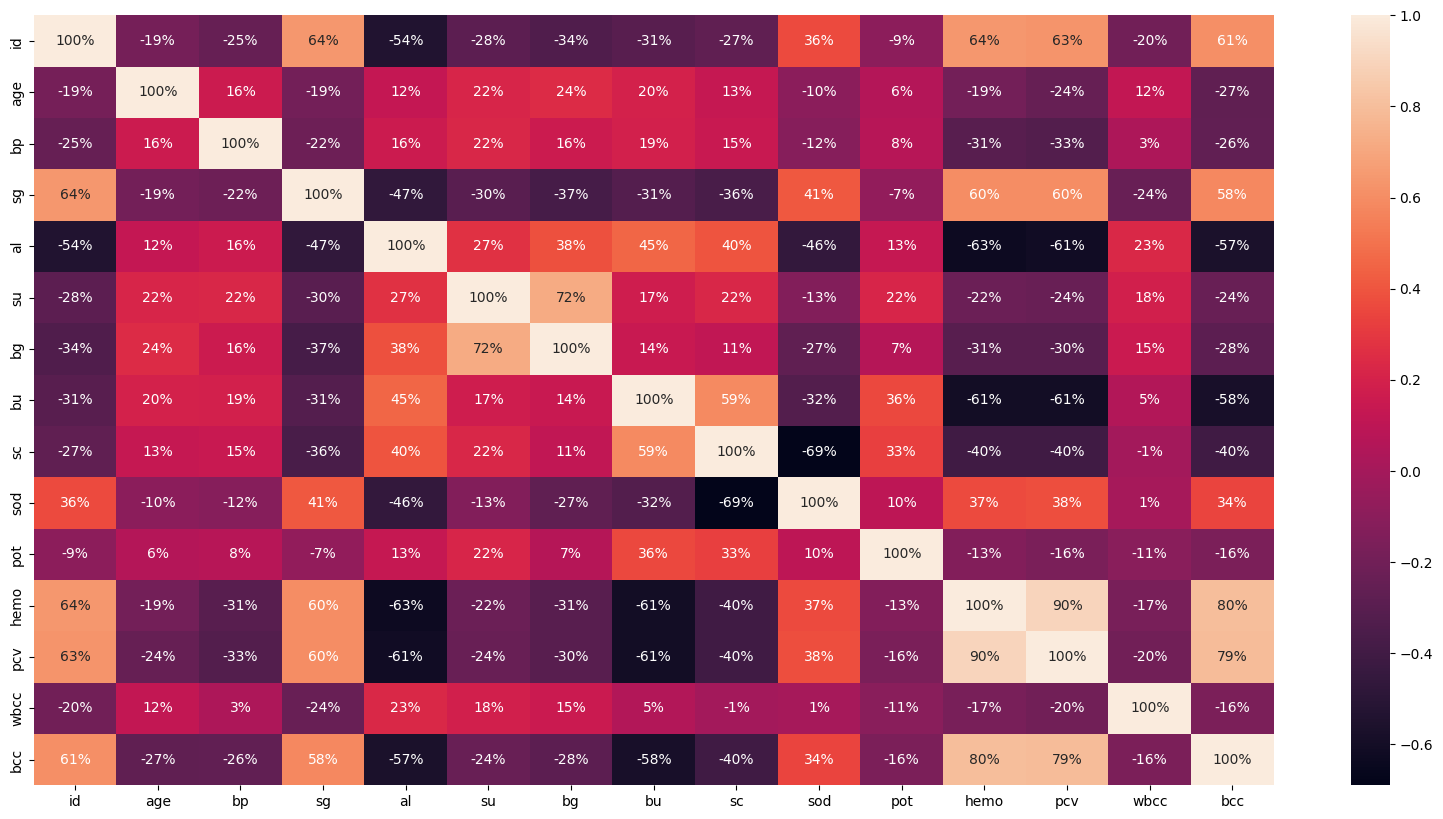

In [11]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True,fmt='.0%')

<Axes: title={'center': 'Count of Diagnosis of kidney disease'}>

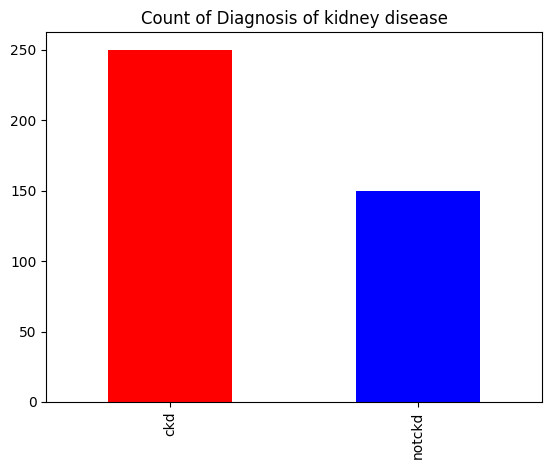

In [12]:
df['class'].value_counts().plot(kind='bar',color=['RED','blue'],title="Count of Diagnosis of kidney disease")

<Axes: title={'center': 'Distribution of Hypertension patients '}>

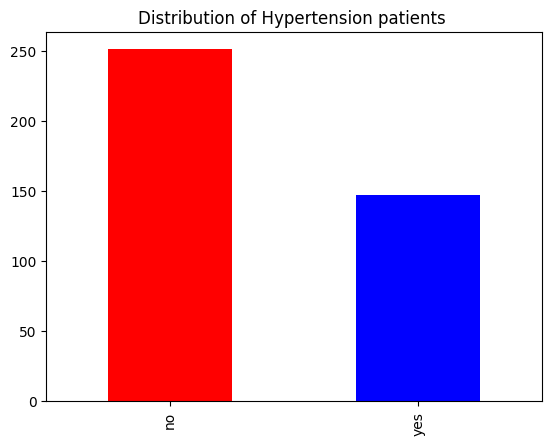

In [13]:
df['htn'].value_counts().plot(kind='bar',color=['RED','blue'],title="Distribution of Hypertension patients ")

<Axes: title={'center': 'Distribution of Anemia patients '}>

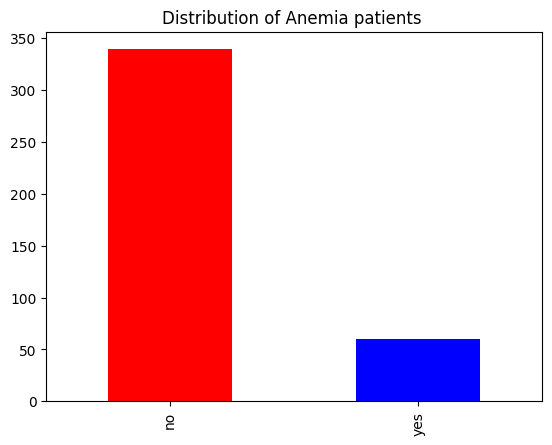

In [14]:
df['ane'].value_counts().plot(kind='bar',color=['RED','blue'],title="Distribution of Anemia patients ")

<Axes: ylabel='Frequency'>

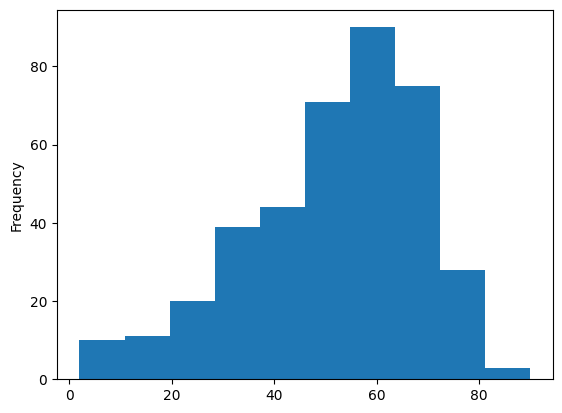

In [15]:
df['age'].plot(kind='hist')

In [16]:
data['class'] = data['class'].map({'ckd':1,'notckd':0})
data['htn'] = data['htn'].map({'yes':1,'no':2})
data['dm'] = data['dm'].map({'yes':1,'no':2})
data['cad'] = data['cad'].map({'yes':1,'no':2})
data['appet'] = data['appet'].map({'good':1,'poor':2})
data['ane'] = data['ane'].map({'yes':1,'no':2})
data['pe'] = data['pe'].map({'yes':1,'no':2})
data['ba'] = data['ba'].map({'present':1,'notpresent':2})
data['pcc'] = data['pcc'].map({'present':1,'notpresent':2})
data['pc'] = data['pc'].map({'abnormal':1,'normal':2})
data['bc'] = data['bc'].map({'abnormal':1,'normal':2})
data.head(100)

,id,age,bp,sg,al,su,bc,pc,pcc,ba,...,pcv,wbcc,bcc,htn,dm,cad,appet,pe,ane,class
0,1,48.0,80.0,1.020,1.0,0.0,NaN,2.0,2.0,2.0,...,44.0,7800.0,5.2,1.0,1.0,2.0,1.0,2.0,2.0,1
1,2,7.0,50.0,1.020,4.0,0.0,NaN,2.0,2.0,2.0,...,38.0,6000.0,NaN,2.0,2.0,2.0,1.0,2.0,2.0,1
2,3,62.0,80.0,1.010,2.0,3.0,2.0,2.0,2.0,2.0,...,31.0,7500.0,NaN,2.0,1.0,2.0,2.0,2.0,1.0,1
3,4,48.0,70.0,1.005,4.0,0.0,2.0,1.0,1.0,2.0,...,32.0,6700.0,3.9,1.0,2.0,2.0,2.0,1.0,1.0,1
4,5,51.0,80.0,1.010,2.0,0.0,2.0,2.0,2.0,2.0,...,35.0,7300.0,4.6,2.0,2.0,2.0,1.0,2.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,62.0,90.0,1.015,1.0,0.0,NaN,2.0,2.0,2.0,...,NaN,NaN,NaN,1.0,2.0,2.0,1.0,1.0,1.0,1
96,97,60.0,80.0,1.010,1.0,1.0,NaN,2.0,2.0,2.0,...,36.0,NaN,NaN,2.0,1.0,1.0,2.0,2.0,2.0,1
97,98,65.0,60.0,1.015,1.0,0.0,NaN,2.0,2.0,2.0,...,32.0,9100.0,4.0,1.0,1.0,2.0,2.0,1.0,2.0,1
98,99,50.0,140.0,NaN,NaN,NaN,NaN,NaN,2.0,2.0,...,18.0,5800.0,2.3,1.0,1.0,2.0,2.0,2.0,1.0,1


In [17]:
data=data.drop(['id'], axis=1)

In [18]:
data = data.fillna(0)

In [19]:
data.isna().sum()

age      0
bp       0
sg       0
al       0
su       0
bc       0
pc       0
pcc      0
ba       0
bg       0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
bcc      0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [20]:
X = data.iloc[:,:-1]
y = data.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [21]:
X

,age,bp,sg,al,su,bc,pc,pcc,ba,bg,...,hemo,pcv,wbcc,bcc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,0.0,2.0,2.0,2.0,121.0,...,15.4,44.0,7800.0,5.2,1.0,1.0,2.0,1.0,2.0,2.0
1,7.0,50.0,1.020,4.0,0.0,0.0,2.0,2.0,2.0,0.0,...,11.3,38.0,6000.0,0.0,2.0,2.0,2.0,1.0,2.0,2.0
2,62.0,80.0,1.010,2.0,3.0,2.0,2.0,2.0,2.0,423.0,...,9.6,31.0,7500.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0
3,48.0,70.0,1.005,4.0,0.0,2.0,1.0,1.0,2.0,117.0,...,11.2,32.0,6700.0,3.9,1.0,2.0,2.0,2.0,1.0,1.0
4,51.0,80.0,1.010,2.0,0.0,2.0,2.0,2.0,2.0,106.0,...,11.6,35.0,7300.0,4.6,2.0,2.0,2.0,1.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,2.0,2.0,2.0,2.0,140.0,...,15.7,47.0,6700.0,4.9,2.0,2.0,2.0,1.0,2.0,2.0
396,42.0,70.0,1.025,0.0,0.0,2.0,2.0,2.0,2.0,75.0,...,16.5,54.0,7800.0,6.2,2.0,2.0,2.0,1.0,2.0,2.0
397,12.0,80.0,1.020,0.0,0.0,2.0,2.0,2.0,2.0,100.0,...,15.8,49.0,6600.0,5.4,2.0,2.0,2.0,1.0,2.0,2.0
398,17.0,60.0,1.025,0.0,0.0,2.0,2.0,2.0,2.0,114.0,...,14.2,51.0,7200.0,5.9,2.0,2.0,2.0,1.0,2.0,2.0


**LINEAR SVM**

In [22]:
#Create the SVM model
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
classifier = SVC(kernel = 'linear', random_state = 15)
#Fit the model for the data

classifier.fit(X_train, y_train)

#Make the prediction
y_pred = classifier.predict(X_test)

In [23]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([48, 72]))

In [24]:
y_pred=classifier.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
score = accuracy_score(y_test,y_pred)
print(score)


[[45  3]
 [ 1 71]]
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        48
           1       0.96      0.99      0.97        72

    accuracy                           0.97       120
   macro avg       0.97      0.96      0.97       120
weighted avg       0.97      0.97      0.97       120

0.9666666666666667


In [25]:
def classwise_accuracy():
   a = pd.crosstab(y_test,y_pred)
   print(a.max(axis=1)/a.sum(axis=1))
classwise_accuracy()

row_0
0    0.937500
1    0.986111
dtype: float64


ROCAUC SCORE : 0.9618055555555556


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


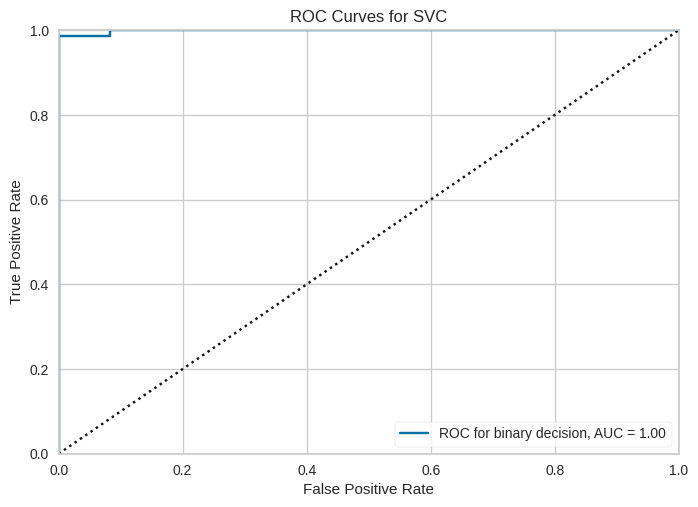

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [26]:
print("ROCAUC SCORE :",roc_auc_score(y_test,y_pred))
from yellowbrick.classifier import ROCAUC
curve=ROCAUC(classifier,binary=True)
curve.fit(X_train,y_train)
curve.score(X_test,y_test)
curve.show()

**LOGISTIC REGRESSION**

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [ ]:
logreg.fit(X_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
logreg.score(X_train,y_train)

0.93125

In [ ]:
logreg.score(X_test,y_test)

0.95

In [ ]:
y_pred=logreg.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
score = accuracy_score(y_test,y_pred)
print(score)


[[28  0]
 [ 4 48]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93        28
           1       1.00      0.92      0.96        52

    accuracy                           0.95        80
   macro avg       0.94      0.96      0.95        80
weighted avg       0.96      0.95      0.95        80

0.95


In [ ]:
def classwise_accuracy():
   a = pd.crosstab(y_test,y_pred)
   print(a.max(axis=1)/a.sum(axis=1))
classwise_accuracy()

row_0
0    1.000000
1    0.923077
dtype: float64


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


ROCAUC SCORE : 0.9615384615384616


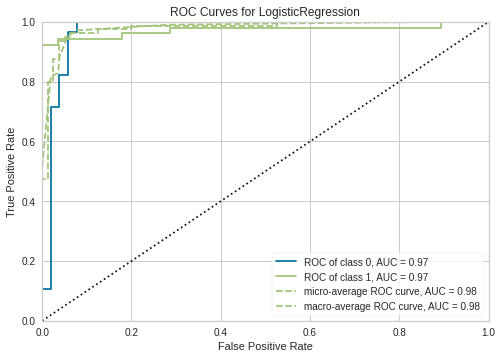

<AxesSubplot:title={'center':'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
print("ROCAUC SCORE :",roc_auc_score(y_test,y_pred))
from yellowbrick.classifier import ROCAUC
curve=ROCAUC(logreg)
curve.fit(X_train,y_train)
curve.score(X_test,y_test)
curve.show()

**CART DT**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.20, random_state = 0)
clf = DecisionTreeClassifier(max_depth = 5, random_state = 0,criterion ="gini")

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([28, 52]))

[Text(0.6193181818181818, 0.9166666666666666, 'hemo <= 12.95\ngini = 0.472\nsamples = 320\nvalue = [122, 198]'),
 Text(0.42045454545454547, 0.75, 'bcc <= 5.65\ngini = 0.062\nsamples = 186\nvalue = [6, 180]'),
 Text(0.29545454545454547, 0.5833333333333334, 'sod <= 148.5\ngini = 0.043\nsamples = 183\nvalue = [4, 179]'),
 Text(0.18181818181818182, 0.4166666666666667, 'pcv <= 41.5\ngini = 0.033\nsamples = 181\nvalue = [3, 178]'),
 Text(0.09090909090909091, 0.25, 'sc <= 1.15\ngini = 0.022\nsamples = 177\nvalue = [2, 175]'),
 Text(0.045454545454545456, 0.08333333333333333, 'gini = 0.114\nsamples = 33\nvalue = [2, 31]'),
 Text(0.13636363636363635, 0.08333333333333333, 'gini = 0.0\nsamples = 144\nvalue = [0, 144]'),
 Text(0.2727272727272727, 0.25, 'hemo <= 6.2\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.22727272727272727, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3181818181818182, 0.08333333333333333, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.

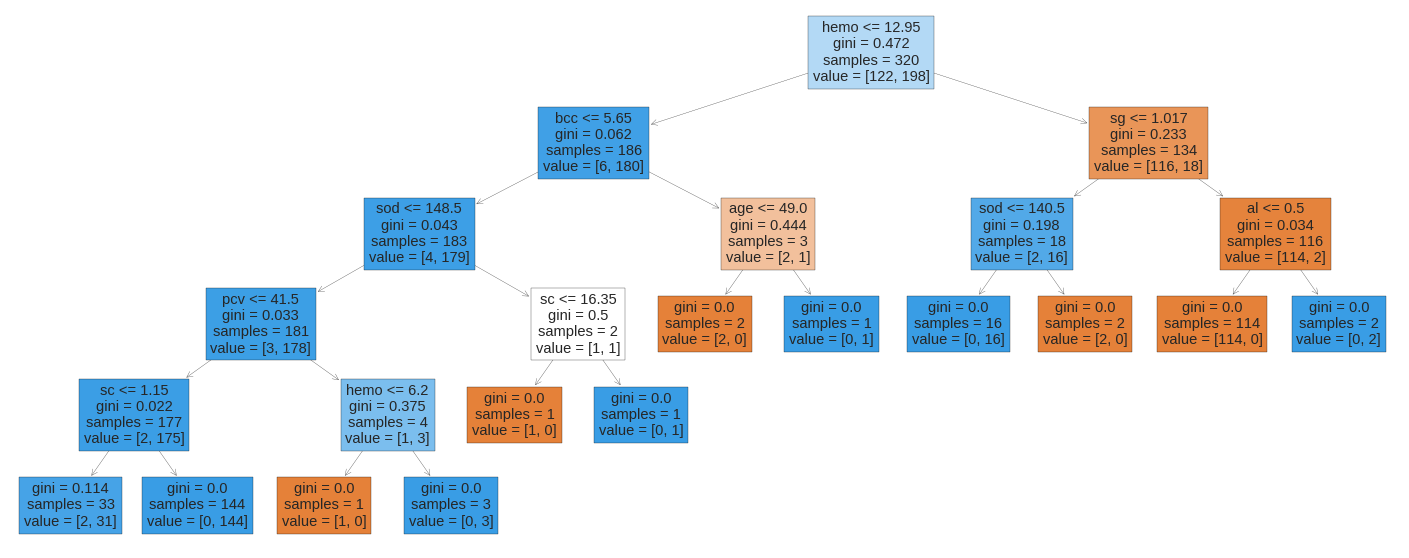

In [ ]:
plt.figure(figsize = (25,10))
clf.fit(X_train,y_train)
tree.plot_tree(clf,filled=True,feature_names = x.columns)

In [ ]:
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
score = accuracy_score(y_test,y_pred)
print(score)

[[26  2]
 [ 3 49]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91        28
           1       0.96      0.94      0.95        52

    accuracy                           0.94        80
   macro avg       0.93      0.94      0.93        80
weighted avg       0.94      0.94      0.94        80

0.9375


In [ ]:
def classwise_accuracy():
   a = pd.crosstab(y_test,y_pred)
   print(a.max(axis=1)/a.sum(axis=1))
classwise_accuracy()

row_0
0    0.928571
1    0.942308
dtype: float64


ROCAUC SCORE : 0.9354395604395604


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


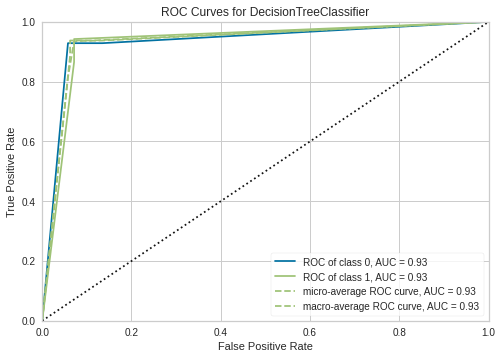

<AxesSubplot:title={'center':'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
print("ROCAUC SCORE :",roc_auc_score(y_test,y_pred))
from yellowbrick.classifier import ROCAUC
curve=ROCAUC(clf)
curve.fit(X_train,y_train)
curve.score(X_test,y_test)
curve.show()

**RANDOM FOREST**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
sel = RandomForestClassifier(n_estimators=20, random_state=42) #entropy #20-25 gives best
sel.fit(X_train, y_train)
y_pred = sel.predict(X_test)

In [ ]:
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
score = accuracy_score(y_test,y_pred)
print(score)

[[28  0]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

1.0


In [ ]:
def classwise_accuracy():
   a = pd.crosstab(y_test,y_pred)
   print(a.max(axis=1)/a.sum(axis=1))
classwise_accuracy()

row_0
0    1.0
1    1.0
dtype: float64


ROCAUC SCORE : 1.0


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


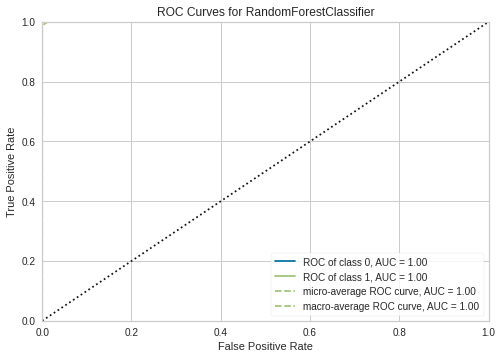

<AxesSubplot:title={'center':'ROC Curves for RandomForestClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
print("ROCAUC SCORE :",roc_auc_score(y_test,y_pred))
from yellowbrick.classifier import ROCAUC
curve=ROCAUC(sel)
curve.fit(X_train,y_train)
curve.score(X_test,y_test)
curve.show()

**BAGGING -DT**

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


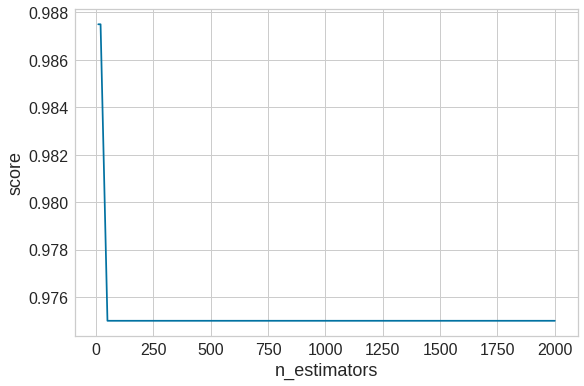

In [ ]:
from sklearn.ensemble import BaggingClassifier

estimator_range = [10,20,50,100,200,500,1000,2000]

models = []
scores = []

for n_estimators in estimator_range:

    # Create bagging classifier
    clf = BaggingClassifier(n_estimators = n_estimators, random_state = 0,oob_score=True,max_samples=0.8)

    # Fit the model
    clf.fit(X_train, y_train)

    # Append the model and score to their respective list
    models.append(clf)
    scores.append(accuracy_score(y_true = y_test, y_pred = clf.predict(X_test)))

# Generate the plot of scores against number of estimators
plt.figure(figsize=(9,6))
plt.plot(estimator_range, scores)

# Adjust labels and font (to make visable)
plt.xlabel("n_estimators", fontsize = 18)
plt.ylabel("score", fontsize = 18)
plt.tick_params(labelsize = 16)

# Visualize plot
plt.show()

**BAGGING DT**

In [ ]:
from sklearn.ensemble import BaggingClassifier
bagmodel= BaggingClassifier(
    estimator=DecisionTreeClassifier(), #DecisionTreeClassifier RandomForestClassifier
    n_estimators=10,

    oob_score=True,
    random_state=0
)

bagmodel.fit(X_train,y_train)
bagmodel.oob_score_

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:789: UserWarning: Some inputs do not have OOB scores. This probably means too few estimators were used to compute any reliable oob estimates.
  warn(
/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_bagging.py:795: RuntimeWarning: invalid value encountered in true_divide
  oob_decision_function = predictions / predictions.sum(axis=1)[:, np.newaxis]


0.940625

In [ ]:
np.unique(y_test,return_counts=True)

(array([0, 1]), array([28, 52]))

In [ ]:
y_pred=clf.predict(X_test)
cm= confusion_matrix(y_test,y_pred)
print(cm)
print(classification_report(y_test,y_pred))
score = accuracy_score(y_test,y_pred)
print(score)

[[26  2]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80

0.975


In [ ]:
def classwise_accuracy():
   a = pd.crosstab(y_test,y_pred)
   print(a.max(axis=1)/a.sum(axis=1))
classwise_accuracy()

row_0
0    0.928571
1    1.000000
dtype: float64


ROCAUC SCORE : 0.9642857142857143


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


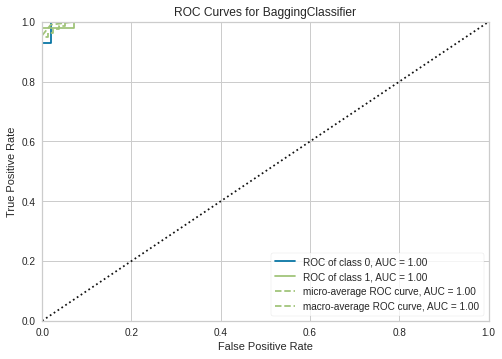

<AxesSubplot:title={'center':'ROC Curves for BaggingClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [ ]:
print("ROCAUC SCORE :",roc_auc_score(y_test,y_pred))
from yellowbrick.classifier import ROCAUC
curve=ROCAUC(clf)
curve.fit(X_train,y_train)
curve.score(X_test,y_test)
curve.show()